<a href="https://colab.research.google.com/github/VshardNarthi/Location-intelligance/blob/main/GIS_Analysis_Japan_Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 21.4 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from google.colab import drive
import folium
from folium.plugins import MarkerCluster
from shapely.ops import cascaded_union
import cartopy.crs as ccrs
import seaborn as sns

Excecl preprocessing

In [ ]:
path = "japan.csv"
japan_df = pd.read_csv(path)
print(japan_df.head())


                       time  latitude  longitude   depth  mag magType  gap  \
0  2021-10-07T16:44:22.445Z   31.8288   137.9307  377.87  4.1      mb  134   
1  2021-10-07T13:41:24.549Z   35.5771   140.0698   62.00  5.9     mww   29   
2  2021-10-06T08:12:55.045Z   31.2593   131.4710   35.00  5.4     mww   38   
3  2021-10-05T17:46:02.054Z   40.0760   142.2531   44.77  5.7     mww   15   
4  2021-10-05T14:22:02.422Z   40.4015   143.8468   10.00  4.5      mb  136   

    dmin   rms    updated  Day Time    Time                 place  depthError  \
0  2.044  0.37  10/7/2021          0   0.00   279 km SE of Shing?         8.4   
1  1.788  1.12  10/8/2021          0  14.22     4 km WSW of Chiba         1.9   
2  0.905  1.36  10/7/2021          1   3.18   33 km SE of Kushima         1.9   
3  1.153  0.86  10/7/2021          0  15.00   54 km NNE of Miyako         4.1   
4  1.693  0.32  10/5/2021          1   6.00  183 km ENE of Miyako         1.9   

   magError  magNst  
0     0.059      80  


In [ ]:
column_counts = japan_df.count()
print(column_counts)

time          1848
latitude      1848
longitude     1848
depth         1848
mag           1848
magType       1848
gap           1848
dmin          1848
rms           1848
updated       1848
Day Time      1848
Time          1848
place         1847
depthError    1848
magError      1848
magNst        1848
dtype: int64


In [ ]:
japan_df.drop([ 'place','Time'], axis=1, inplace=True)

In [ ]:
print(japan_df.head())

   latitude  longitude   depth  mag magType  gap   dmin   rms    updated  \
0   31.8288   137.9307  377.87  4.1      mb  134  2.044  0.37  10/7/2021   
1   35.5771   140.0698   62.00  5.9     mww   29  1.788  1.12  10/8/2021   
2   31.2593   131.4710   35.00  5.4     mww   38  0.905  1.36  10/7/2021   
3   40.0760   142.2531   44.77  5.7     mww   15  1.153  0.86  10/7/2021   
4   40.4015   143.8468   10.00  4.5      mb  136  1.693  0.32  10/5/2021   

   Day Time   depthError  magError  magNst  
0          0         8.4     0.059      80  
1          0         1.9     0.055      32  
2          1         1.9     0.061      26  
3          0         4.1     0.046      45  
4          1         1.9     0.156      15  


In [ ]:
print(japan_df.dtypes)



latitude             float64
longitude            float64
depth                float64
mag                  float64
magType               object
gap                    int64
dmin                 float64
rms                  float64
updated       datetime64[ns]
Day Time               int64
depthError           float64
magError             float64
magNst                 int64
dtype: object


In [ ]:
japan_df['updated'] = pd.to_datetime(japan_df['updated'])

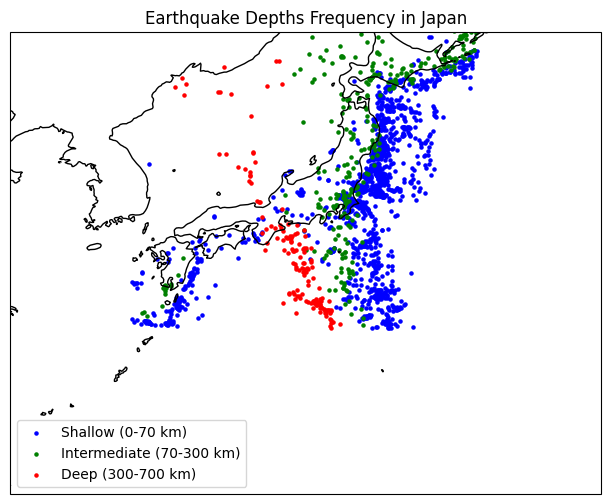

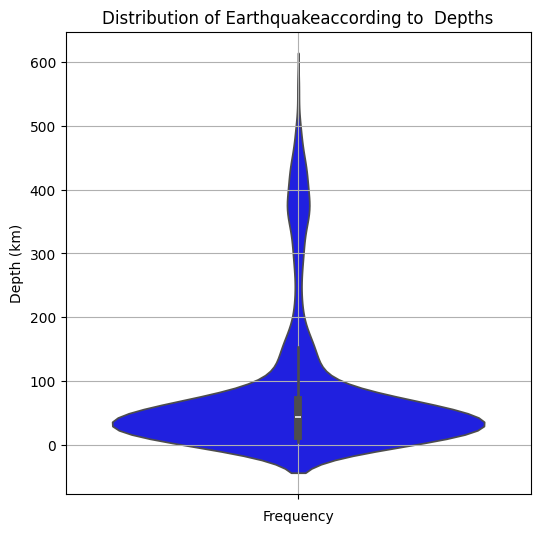

In [ ]:
shallow = japan_df[(japan_df['depth'] >= 0) & (japan_df['depth'] <= 70)]
intermediate = japan_df[(japan_df['depth'] > 70) & (japan_df['depth'] <= 300)]
deep = japan_df[(japan_df['depth'] > 300) & (japan_df['depth'] <= 700)]

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([122, 154, 20, 45], crs=ccrs.PlateCarree())

ax.scatter(shallow['longitude'], shallow['latitude'], color='blue', s=5, label='Shallow (0-70 km)')
ax.scatter(intermediate['longitude'], intermediate['latitude'], color='green', s=5, label='Intermediate (70-300 km)')
ax.scatter(deep['longitude'], deep['latitude'], color='red', s=5, label='Deep (300-700 km)')

ax.coastlines()
plt.legend()
plt.title('Earthquake Depths Frequency in Japan')
plt.show()

plt.figure(figsize=(6, 6))
sns.violinplot(data=japan_df, y='depth', color='blue')
plt.title('Distribution of Earthquake according to  Depths')
plt.ylabel('Depth (km)')
plt.xlabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
m = folium.Map(location=[35.68, 139.76], zoom_start=6)
shallow_cluster = MarkerCluster(name='Shallow_depth (0-70 km)').add_to(m)
intermediate_cluster = MarkerCluster(name='Intermediate_depth (70-300 km)').add_to(m)
deep_cluster = MarkerCluster(name='Deep_depth (300-700 km)').add_to(m)

for idx, row in japan_df.iterrows():
    if row['depth'] <= 70:
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=5,
                            color='blue',
                            fill=True,
                            fill_color='blue',
                            popup=f'Depth: {row["depth"]} km').add_to(shallow_cluster)
    elif row['depth'] <= 300:
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=5,
                            color='green',
                            fill=True,
                            fill_color='green',
                            popup=f'Depth: {row["depth"]} km').add_to(intermediate_cluster)
    else:
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=5,
                            color='red',
                            fill=True,
                            fill_color='red',
                            popup=f'Depth: {row["depth"]} km').add_to(deep_cluster)


folium.LayerControl(collapsed=False).add_to(m)
m.save('interactive_map_depth.html')

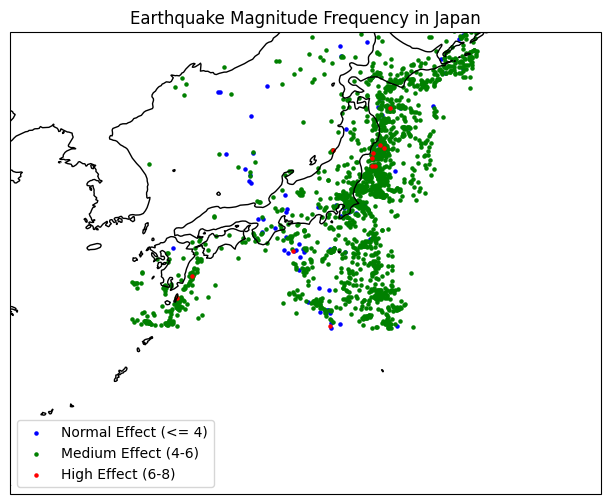

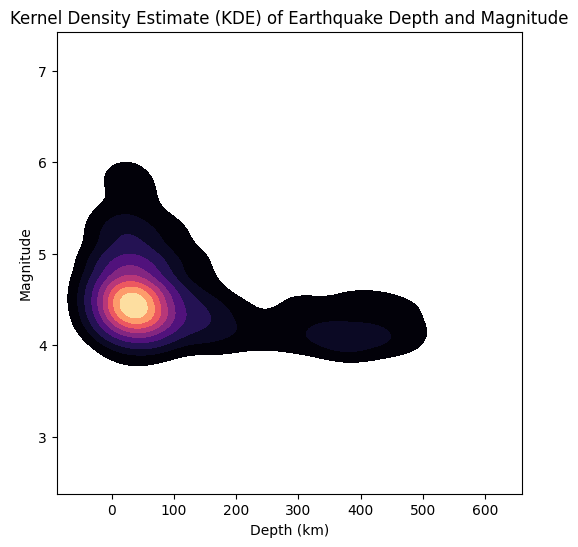

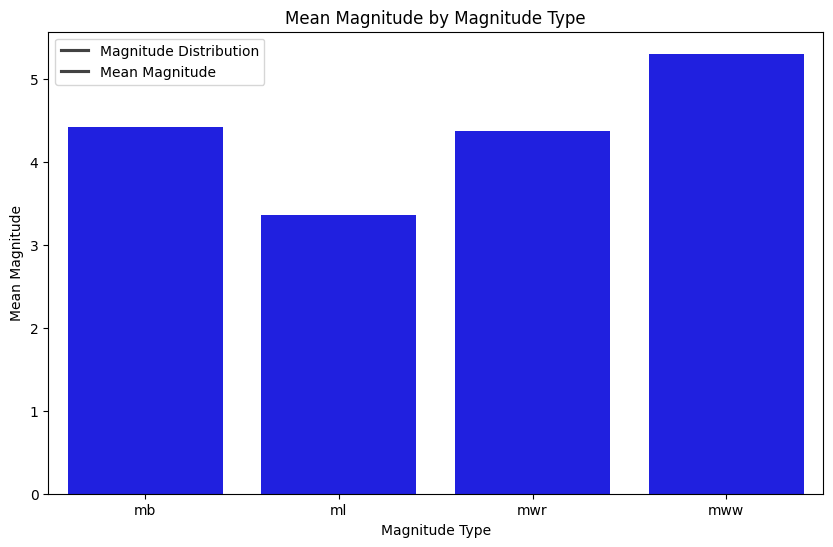

In [ ]:
normal_effect = japan_df[japan_df['mag'] <= 4]
medium_effect = japan_df[(japan_df['mag'] > 4) & (japan_df['mag'] <= 6)]
high_effect = japan_df[(japan_df['mag'] > 6) & (japan_df['mag'] <= 8)]

df = japan_df[japan_df['mag'] < 10]

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([122, 154, 20, 45], crs=ccrs.PlateCarree())

ax.scatter(normal_effect['longitude'], normal_effect['latitude'], color='blue', s=5, label='Normal Effect (<= 4)')
ax.scatter(medium_effect['longitude'], medium_effect['latitude'], color='green', s=5, label='Medium Effect (4-6)')
ax.scatter(high_effect['longitude'], high_effect['latitude'], color='red', s=5, label='High Effect (6-8)')

ax.coastlines()
plt.legend()
plt.title('Earthquake Magnitude Frequency in Japan')
plt.show()

plt.figure(figsize=(6, 6))
sns.kdeplot(data=japan_df, x='depth', y='mag', cmap='magma', fill=True, levels=10)
plt.title('Kernel Density Estimate (KDE) of Earthquake Depth and Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

mean_magnitude = japan_df.groupby('magType')['mag'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=mean_magnitude.index, y=mean_magnitude.values, color='blue')
plt.title('Mean Magnitude by Magnitude Type')
plt.xlabel('Magnitude Type')
plt.ylabel('Mean Magnitude')
plt.legend(['Magnitude Distribution', 'Mean Magnitude'])
plt.show()


SyntaxError: invalid syntax (<ipython-input-89-61cfc86c312d>, line 4)